In [19]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [20]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

b. Solve the steady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

c. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

In [ ]:
pwd

'/home/nadine/Desktop/PPQ2'

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

**Exercise 1** **<font color='red'> 4/4 </font>**

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [ ]:
#4pt
def ReverCase(s):
    t = ""
    for i in s:
        if i.isupper():
            t += i.lower()
        if i.islower():
            t += i.upper()
    return t
print("ReverCase(Nadine Bisa345& Cyizere) = ",ReverCase("Nadine Bisa345& Cyizere"))

ReverCase(Nadine Bisa345& Cyizere) =  nADINEbISAcYIZERE


2- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

<font color=red> (4/4) </font>

In [ ]:
#4pt
def neg(x):
    b = []
    for ne in x:
        if ne < 0:
            b.append(ne)
    if len(b) == 0:
        return 0
    return max(b)

def MaxNegMat(M):
    som = 0
    for i in range(len(M)):
        som += neg(M[i])
    return som
print("MaxNegMat([[-2,5],[-7,1],[-5,-1]]) = ", MaxNegMat([[-2,5],[-7,1],[-5,-1]]))

MaxNegMat([[-2,5],[-7,1],[-5,-1]]) =  -10


**Exercise 2<font color=red> (5/5) </font>**

1-The cost of admission to a popular music concert was 
- 40 USD for 1 children and 1 male
- 170 USD  for 4 children, 2 females and 3 males 
- 190 USD  for 5 children, 4 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

#2pt\
x = Children, y = Female, z = Male
\begin{equation}
\begin{cases}
    x + z = 40\\
    4x + 2y + 3z = 170\\
    5x + 4y + 2z = 190
\end{cases}
\end{equation}

2- Write a Python code to compute and display how much was the admission for each child, female and male?

In [ ]:
#3pt
A = np.array([[1, 0, 1], [4, 2, 3], [5, 4, 2]])
b = np.array([40, 170, 190])
x, y, z = np.linalg.solve(A,b)
print("x = ", x, "y = ", y, "z = ", z)

x =  9.999999999999996 y =  20.000000000000004 z =  30.000000000000007


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}

<font color=red> 5/5 </font>

In [ ]:
#5pt
def myfunction(z):
    x = z[0]
    y = z[1]
    
    F = np.empty((2))
    F[0] = x**2 + x + y - 2
    F[1] = 2*np.exp(x) + 3*y - 8
    return F

z_g = np.array([1,1])
z = fsolve(myfunction, z_g)
print("x = ", z[0], "y = ", z[1])

x =  -3.5025076898226905e-12 y =  2.000000000000468


**Exercise 3** <font color=red> (6.5/9) </font>

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

<font color=red> (4/4) </font>

In [ ]:
#4pt
f_a = lambda x : (x**3 + 5*x - 20) / (x**2 + 3)
A = quad(f_a, 0, 2)
f_b = lambda x : (x - (1/3)) * np.sqrt(x**4 - 3)
B = quad(f_b, 3, 5)
print("A = ", A[0], "B = ", B[0])

A =  -7.049316535735796 B =  124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

<font color=red>(2.25/3) </font>

<font color=red>Your definition of the summation Z is wrong </font>

In [ ]:
#3pt
def Trap(a, b, f, H = 0.001):
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    Z = 0
    for i in range(1, N+1):
        Z += H*(x[i-1] + x[i])/2
    return Z

3- Compute the integrales A and B using your function **Trap**

<font color=red>(0.25/2) </font>

In [ ]:
#2pt
f_A = lambda x : (x**3 + 5*x - 20) / (x**2 + 3)
A_2 = Trap(0,2,f_A)
f_B = lambda x : (x - 1/3) * np.sqrt(x**4 - 3)
B_2 = Trap(3,5,f_B)
print("A = ",A_2, "B = ", B_2)

A =  1.9999999999999998 B =  8.0


**Exercise 4** <font color=red>(21/21) **_Excellent_** </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

- <font color=blue>Your function name should be **SODE** not **SODA**  </font>

- <font color=blue>According to the problem you may consoder to have function **function** inside the function **SODA**  </font>

In [ ]:
#5pt
def function(z, x):
    y,v = z
    dydx = v
    dvdx = -2*v + 30 *( np.exp(3*x))
    return np.array([dydx, dvdx])

def SODA(a, b, H = 0.001):
    yi = np.array([2, 8])
    N = int((b-a)/H)
    x = np.linspace(a, b, N+1)
    solution = odeint(function , yi, x)
    return x, solution[:,0]

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

Text(0, 0.5, 'yk')

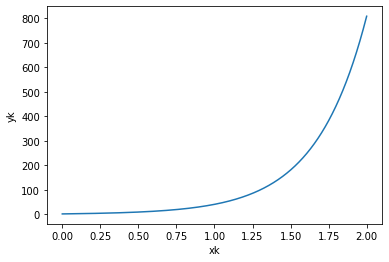

In [ ]:
#4pt
z = SODA(0, 2)
xk = z[0]
yk = z[1]
plt.plot(xk,yk)
plt.xlabel('xk')
plt.ylabel('yk')

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

Text(0, 0.5, 'abs(yk - gk(xk)')

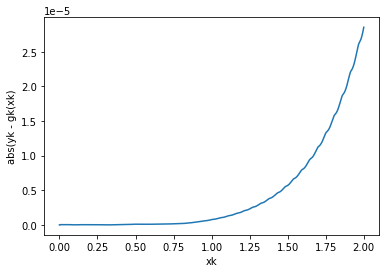

In [ ]:
#3pt
gk = lambda x : 2 * np.exp(3*x) - np.exp(-2*x) + 1

plt.plot(xk, abs(yk - gk(xk)))
plt.xlabel('xk')
plt.ylabel("abs(yk - gk(xk)")

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_{k = 0}^N H(y_k - g_k)^2$$

In [ ]:
#3pt h:vecotrization
def L2_error(a, b, H):
    YK = SODA(a,b,H)[1]
    GK = gk(SODA(a,b,H)[0])
    N = int((b-a)/H)
    total = 0
    for i in range(0, N+1):
        total += (H*(YK[i] - GK[i])**2)
    return total

4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [ ]:
#3pt
H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])
𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, 10**(-1)),L2_error(0, 2, 10**(-2)),L2_error(0, 2, 10**(-3)), L2_error(0, 2, 10**(-4))])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

𝐿2𝐸𝑟𝑗 =  [1.76688197e-10 1.34088211e-10 1.29754197e-10 1.31295082e-10]


5- Plot the array of $L2Er_j$ against the array of $H_j$.

Text(0, 0.5, 'L2Erj')

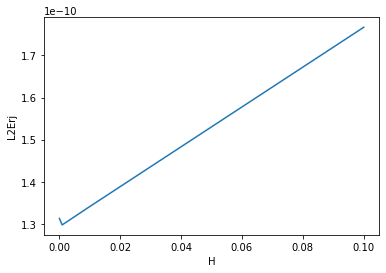

In [ ]:
#3pt
plt.plot(H,𝐿2𝐸𝑟𝑗)
plt.xlabel('H')
plt.ylabel("L2Erj")